In [1]:
import gc
import pandas as pd
import numpy as np
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import KFold
from hyperopt import STATUS_OK, tpe, hp, Trials, fmin
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
gc.collect()

7

In [3]:
lgb_300_preds_1 = pd.read_csv('./new_features2/lgb_300features_1000.csv', index_col='seg_id')
lgb_500_preds_1 = pd.read_csv('./new_features2/lgb_500features_1000.csv', index_col='seg_id')
lgb_700_preds_1 = pd.read_csv('./new_features2/lgb_700features_1000.csv', index_col='seg_id')
lgb_gb300_preds_1 = pd.read_csv('./new_features2/lgb_gb300features_1000.csv', index_col='seg_id')
xgb_500_preds_1 = pd.read_csv('./new_features2/xgb_500features_1000.csv', index_col='seg_id')

In [4]:
oof_lgb_300_1 = pd.read_csv('./new_features2/oof_lgb_300features_1000.csv', index_col='Unnamed: 0', nrows=4195)
oof_lgb_500_1 = pd.read_csv('./new_features2/oof_lgb_500features_1000.csv', nrows=4195)
oof_lgb_700_1 = pd.read_csv('./new_features2/oof_lgb_700features_1000.csv', nrows=4195)
oof_lgb_gb300_1 = pd.read_csv('./new_features2/oof_lgb_gb300features_1000.csv', index_col='Unnamed: 0', nrows=4195)
oof_xgb_500_1 = pd.read_csv('./new_features2/oof_xgb_500features_1000.csv', index_col='Unnamed: 0', nrows=4195)

In [5]:
y = pd.read_csv('./new_features2/y.csv', nrows=4195)

In [6]:
oof_lgb_300_1 = oof_lgb_300_1.values.reshape((4195,))
oof_lgb_500_1 = oof_lgb_500_1.values.reshape((4195,))
oof_lgb_700_1 = oof_lgb_700_1.values.reshape((4195,))
oof_lgb_gb300_1 = oof_lgb_gb300_1.values.reshape((4195,))
oof_xgb_500_1 = oof_xgb_500_1.values.reshape((4195,))

In [7]:
lgb_300_preds_1 = lgb_300_preds_1.time_to_failure.values.reshape((2624,))
lgb_500_preds_1 = lgb_500_preds_1.time_to_failure.values.reshape((2624,))
lgb_700_preds_1 = lgb_700_preds_1.time_to_failure.values.reshape((2624,))
lgb_gb300_preds_1 = lgb_gb300_preds_1.time_to_failure.values.reshape((2624,))
xgb_500_preds_1 = xgb_500_preds_1.time_to_failure.values.reshape((2624,))

In [8]:
lgb_300_preds_2 = pd.read_csv('./new_features3/lgb_300features_1000.csv', index_col='seg_id').time_to_failure.values.reshape((2624,))
lgb_400_preds_2 = pd.read_csv('./new_features3/lgb_400features_1000.csv', index_col='seg_id').time_to_failure.values.reshape((2624,))
lgb_500_preds_2 = pd.read_csv('./new_features3/lgb_500features_1000.csv', index_col='seg_id').time_to_failure.values.reshape((2624,))
xgb_300_preds_2 = pd.read_csv('./new_features3/xgb_300features_1000.csv', index_col='seg_id').time_to_failure.values.reshape((2624,))
xgb_400_preds_2 = pd.read_csv('./new_features3/xgb_400features_2000.csv', index_col='seg_id').time_to_failure.values.reshape((2624,))
xgb_500_preds_2 = pd.read_csv('./new_features3/xgb_500features_1000.csv', index_col='seg_id').time_to_failure.values.reshape((2624,))

In [9]:
oof_lgb_300_2 = pd.read_csv('./new_features3/oof_lgb_300features_1000.csv').values.reshape((4195,))
oof_lgb_400_2 = pd.read_csv('./new_features3/oof_lgb_400features_1000.csv', index_col='Unnamed: 0').values.reshape((4195,))
oof_lgb_500_2 = pd.read_csv('./new_features3/oof_lgb_500features_1000.csv').values.reshape((4195,))
oof_xgb_300_2 = pd.read_csv('./new_features3/oof_xgb_300features_1000.csv', index_col='Unnamed: 0').values.reshape((4195,))
oof_xgb_400_2 = pd.read_csv('./new_features3/oof_xgb_400features_2000.csv', index_col='Unnamed: 0').values.reshape((4195,))
oof_xgb_500_2 = pd.read_csv('./new_features3/oof_xgb_500features_1000.csv', index_col='Unnamed: 0').values.reshape((4195,))

In [11]:
stack_list = [oof_lgb_300_1, oof_lgb_500_1, oof_lgb_700_1, oof_lgb_gb300_1, oof_xgb_500_1, oof_lgb_300_2, oof_lgb_400_2, 
              oof_lgb_500_2, oof_xgb_300_2, oof_xgb_400_2, oof_xgb_500_2]
pred_list = [lgb_300_preds_1, lgb_500_preds_1, lgb_700_preds_1, lgb_gb300_preds_1, xgb_500_preds_1, lgb_300_preds_2, lgb_400_preds_2, 
              lgb_500_preds_2, xgb_300_preds_2, xgb_400_preds_2, xgb_500_preds_2]
columns = ['lgb_300_1', 'lgb_500_1', 'lgb_700_1', 'lgb_gb300_1', 'xgb_500_1', 'lgb_300_2', 'lgb_400_2', 'lgb_500_2',
           'xgb_300_2', 'xgb_400_2', 'xgb_500_2']
train_stack = pd.DataFrame(np.vstack(stack_list).transpose(), columns=columns)
test_stack = pd.DataFrame(np.vstack(pred_list).transpose(), columns=columns)

In [12]:
train_stack.shape

(4195, 11)

In [14]:
train_stack

,lgb_300_1,lgb_500_1,lgb_700_1,lgb_gb300_1,xgb_500_1,lgb_300_2,lgb_400_2,lgb_500_2,xgb_300_2,xgb_400_2,xgb_500_2
0,4.715988,5.725181,5.657988,5.865276,5.104966,5.616580,5.251891,5.906158,3.706874,4.899118,4.935854
1,3.719777,4.281153,4.178152,3.850449,4.159852,4.813529,4.655252,4.151590,4.891765,3.695216,5.047163
2,2.753792,4.002574,4.201605,3.986557,2.986441,4.318425,3.265764,3.560641,2.952261,2.975672,3.522271
3,4.700382,4.009922,4.390248,5.329652,4.115499,3.948261,5.287550,3.332050,4.277524,4.781065,4.253610
4,3.994466,4.313862,4.147679,4.262997,4.261654,3.999810,5.233468,4.132995,4.133911,4.878295,4.237889
5,6.001494,4.516574,4.499717,4.130497,4.894513,4.573499,5.166783,4.857596,4.202496,5.031924,4.924250
6,3.250135,4.327592,4.156588,4.557133,3.688239,3.578410,4.055442,3.899187,2.951000,4.075199,3.711592
7,4.794654,5.847747,5.271023,5.626460,5.672861,6.178081,6.434413,6.080499,5.789600,5.879005,5.791283
8,1.806718,2.214382,2.181906,2.783401,2.769416,2.474098,2.088311,2.701057,3.064381,2.552599,2.533076
9,3.673632,2.651022,1.677358,3.020490,2.468796,2.422893,2.475354,3.233636,3.799676,2.865791,2.881930


In [13]:
y.shape

(4195, 1)

In [15]:
NUM_EVALS = 1000
N_FOLDS = 5
XGB_MAX_LEAVES = 2**12 
XGB_MAX_DEPTH = 50
EVAL_METRIC_XGB_REG = 'mae'
LGBM_MAX_LEAVES = 2**11
LGBM_MAX_DEPTH = 35
EVAL_METRIC_LGBM_REG = 'mae'

In [16]:
def quick_hyperopt(data, labels, package='xgb', num_evals=NUM_EVALS, diagnostic=False):

    #==========
    #XGBoost
    #==========
    
    if package=='xgb':
        
        print('Running {} rounds of XGBoost parameter optimisation:'.format(num_evals))
        #clear space
        gc.collect()
        
        integer_params = ['max_depth']
        
        def objective(space_params):
            
            for param in integer_params:
                space_params[param] = int(space_params[param])
                
            #extract multiple nested tree_method conditional parameters
            #libera te tutemet ex inferis
            if space_params['tree_method']['tree_method'] == 'hist':
                max_bin = space_params['tree_method'].get('max_bin')
                space_params['max_bin'] = int(max_bin)
                if space_params['tree_method']['grow_policy']['grow_policy']['grow_policy'] == 'depthwise':
                    grow_policy = space_params['tree_method'].get('grow_policy').get('grow_policy').get('grow_policy')
                    space_params['grow_policy'] = grow_policy
                    space_params['tree_method'] = 'hist'
                else:
                    max_leaves = space_params['tree_method']['grow_policy']['grow_policy'].get('max_leaves')
                    space_params['grow_policy'] = 'lossguide'
                    space_params['max_leaves'] = int(max_leaves)
                    space_params['tree_method'] = 'hist'
            else:
                space_params['tree_method'] = space_params['tree_method'].get('tree_method')
                
            #for classification replace EVAL_METRIC_XGB_REG with EVAL_METRIC_XGB_CLASS
            cv_results = xgb.cv(space_params, train, num_boost_round=100, nfold=N_FOLDS, metrics=[EVAL_METRIC_XGB_REG],
                             early_stopping_rounds=100, stratified=False, seed=42)
            
            best_loss = cv_results['test-mae-mean'].iloc[-1] #or 'test-rmse-mean' if using RMSE
            #for classification, comment out the line above and uncomment the line below:
            #best_loss = 1 - cv_results['test-auc-mean'].iloc[-1]
            #if necessary, replace 'test-auc-mean' with 'test-[your-preferred-metric]-mean'
            return{'loss':best_loss, 'status': STATUS_OK }
        
        train = xgb.DMatrix(data, labels)
        
        #integer and string parameters, used with hp.choice()
        boosting_list = ['gbtree', 'gblinear'] #if including 'dart', make sure to set 'n_estimators'
        metric_list = ['mae'] 
        #for classification comment out the line above and uncomment the line below
        #metric_list = ['auc']
        #modify as required for other classification metrics classification
        
        tree_method = [{'tree_method' : 'exact'},
               {'tree_method' : 'approx'},
               {'tree_method' : 'hist',
                'max_bin': hp.quniform('max_bin', 2**3, 2**7, 1),
                'grow_policy' : {'grow_policy': {'grow_policy':'depthwise'},
                                'grow_policy' : {'grow_policy':'lossguide',
                                                  'max_leaves': hp.quniform('max_leaves', 32, XGB_MAX_LEAVES, 1)}}}]
        
        #if using GPU, replace 'exact' with 'gpu_exact' and 'hist' with
        #'gpu_hist' in the nested dictionary above
        
        objective_list_reg = ['reg:linear']
        objective_list_class = ['reg:logistic', 'binary:logistic']
        #for classification change line below to 'objective_list = objective_list_class'
        objective_list = objective_list_reg
        
        space ={'boosting' : hp.choice('boosting', boosting_list),
                'tree_method' : hp.choice('tree_method', tree_method),
                'max_depth': hp.quniform('max_depth', 2, XGB_MAX_DEPTH, 1),
                'reg_alpha' : hp.uniform('reg_alpha', 0, 5),
                'reg_lambda' : hp.uniform('reg_lambda', 0, 5),
                'min_child_weight' : hp.uniform('min_child_weight', 0, 5),
                'gamma' : hp.uniform('gamma', 0, 5),
                'learning_rate' : hp.loguniform('learning_rate', np.log(0.005), np.log(0.2)),
                'eval_metric' : hp.choice('eval_metric', metric_list),
                'objective' : hp.choice('objective', objective_list),
                'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1, 0.01),
                'colsample_bynode' : hp.quniform('colsample_bynode', 0.1, 1, 0.01),
                'colsample_bylevel' : hp.quniform('colsample_bylevel', 0.1, 1, 0.01),
                'subsample' : hp.quniform('subsample', 0.5, 1, 0.05),
                'nthread' : 3
            }
        
        trials = Trials()
        best = fmin(fn=objective,
                    space=space,
                    algo=tpe.suggest,
                    max_evals=num_evals, 
                    trials=trials)
        
        best['tree_method'] = tree_method[best['tree_method']]['tree_method']
        best['boosting'] = boosting_list[best['boosting']]
        best['eval_metric'] = metric_list[best['eval_metric']]
        best['objective'] = objective_list[best['objective']]
        
        #cast floats of integer params to int
        for param in integer_params:
            best[param] = int(best[param])
        if 'max_leaves' in best:
            best['max_leaves'] = int(best['max_leaves'])
        if 'max_bin' in best:
            best['max_bin'] = int(best['max_bin'])
        
        print('{' + '\n'.join('{}: {}'.format(k, v) for k, v in best.items()) + '}')
        
        if diagnostic:
            return(best, trials)
        else:
            return(best)

In [17]:
xgb_params2 = quick_hyperopt(train_stack, y, 'xgb', 1000, diagnostic=False)

Running 1000 rounds of XGBoost parameter optimisation:
100%|█| 1000/1000 [1:26:40<00:00,  4.95s/it, best loss: 1.9819337999999997]
{boosting: gblinear
colsample_bylevel: 0.55
colsample_bynode: 0.2
colsample_bytree: 0.89
eval_metric: mae
gamma: 3.595113119956539
learning_rate: 0.03304649124274445
max_bin: 87
max_depth: 16
max_leaves: 1980
min_child_weight: 2.258430127002135
objective: reg:linear
reg_alpha: 1.4201735621605431
reg_lambda: 3.5552318687326796
subsample: 0.55
tree_method: hist}


In [18]:
xgb_params2

{'boosting': 'gblinear',
 'colsample_bylevel': 0.55,
 'colsample_bynode': 0.2,
 'colsample_bytree': 0.89,
 'eval_metric': 'mae',
 'gamma': 3.595113119956539,
 'learning_rate': 0.03304649124274445,
 'max_bin': 87,
 'max_depth': 16,
 'max_leaves': 1980,
 'min_child_weight': 2.258430127002135,
 'objective': 'reg:linear',
 'reg_alpha': 1.4201735621605431,
 'reg_lambda': 3.5552318687326796,
 'subsample': 0.55,
 'tree_method': 'hist'}

In [19]:
MAE = 0
stack_preds = np.zeros(len(test_stack))
feature_importance_stack = pd.DataFrame()
scores = []

n_fold = 5
folds = KFold(n_splits=n_fold, shuffle=True, random_state=0)
for fold, (train_idx, valid_idx) in enumerate(folds.split(train_stack)):
    X_train, y_train = train_stack.iloc[train_idx], y.iloc[train_idx]
    X_valid, y_valid = train_stack.iloc[valid_idx], y.iloc[valid_idx]
    model = xgb.XGBRegressor(**xgb_params2, n_estimators=20000, n_jobs=3)
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)],
              verbose=10000, early_stopping_rounds=200)
    val_pred = model.predict(X_valid)
    fold_importance = pd.DataFrame()
    fold_importance['feature'] = train_stack.columns
    fold_importance['importance'] = model.feature_importances_
    fold_importance['fold'] = fold + 1
    MAE += mean_absolute_error(y_valid, val_pred) / n_fold
    stack_preds += model.predict(test_stack) / n_fold
    feature_importance_stack = pd.concat([feature_importance_stack, fold_importance], axis=0)
    scores.append(mean_absolute_error(y_valid, val_pred))
    
print('CV score: {}, std: {}'.format(MAE, np.std(scores)))

[0]	validation_0-mae:5.05121	validation_1-mae:5.05058
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 200 rounds.
Stopping. Best iteration:
[84]	validation_0-mae:1.73513	validation_1-mae:2.01236

[0]	validation_0-mae:5.01397	validation_1-mae:5.19878
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 200 rounds.
Stopping. Best iteration:
[94]	validation_0-mae:1.69399	validation_1-mae:1.99347

[0]	validation_0-mae:5.05468	validation_1-mae:5.03506
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 200 rounds.
Stopping. Best iteration:
[100]	validation_0-mae:1.63972	validation_1-mae:2.07108

[0]	validation_0-mae:5.02753	validation_1-mae:5.14163
Multiple eval metrics have been passed: 'validation_1-mae' will

In [20]:
submission = pd.read_csv('D:/kaggle/earthquake/sample_submission.csv', index_col='seg_id')
submission.time_to_failure = stack_preds
submission.to_csv('./new_features3/stack_lgb_xgb.csv', index=True)

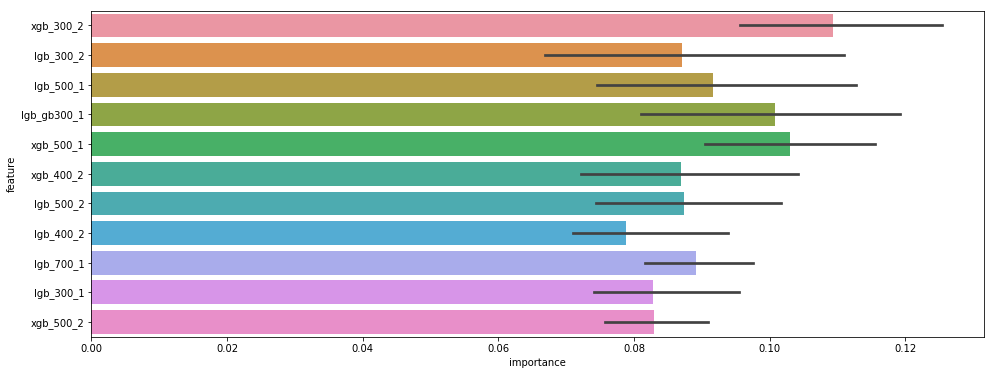

In [21]:
fig = plt.figure(figsize=(16, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_stack.sort_values(by='importance', ascending=False))
plt.show()